In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.ensemble import ExtraTreesRegressor


import matplotlib

In [2]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [5]:
train_set = pd.read_csv('train.csv').iloc[:,1:]
train_set

,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),풍속(m/s),부두길이(m),전면수심(m),부지면적(^m),...,입항시_23,입항시_3,입항시_4,입항시_5,입항시_6,입항시_7,입항시_8,입항시_9,작업효율,작업시간(분)
0,2,421,389,0,7.3,0.0,3.8,1500.0,15.5,1151000,...,0,0,0,0,0,0,0,0,1388.888889,1960.0
1,14,187,82,0,13.9,0.0,0.8,1500.0,15.5,1151000,...,0,0,0,0,0,0,0,0,852.382353,750.0
2,4,1300,1200,0,-5.6,0.0,4.2,1200.0,16.0,840000,...,0,0,0,0,0,0,0,0,1488.000000,1080.0
3,3,218,214,0,19.0,0.0,6.1,2000.0,16.5,1210000,...,0,0,0,0,0,0,1,0,610.400000,597.0
4,6,484,957,0,20.4,0.0,1.8,826.0,15.0,294000,...,0,0,0,0,0,0,0,0,1764.571429,3480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48463,10,609,1250,0,14.4,0.0,2.1,1150.0,16.5,553000,...,0,0,0,1,0,0,0,0,1025.792453,1170.0
48464,5,506,547,0,26.6,0.0,0.5,1500.0,15.5,1151000,...,0,0,0,0,0,0,0,1,1070.415094,1470.0
48465,1,1046,796,0,-1.9,0.0,2.2,800.0,18.0,480000,...,0,0,0,0,0,0,0,0,1165.507463,1320.0
48466,27,319,165,0,23.2,0.0,2.5,1500.0,15.5,1151000,...,0,0,0,0,0,0,0,0,873.495238,1230.0


In [6]:
test_set = pd.read_csv('test.csv').iloc[:,1:]
test_set

,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),풍속(m/s),부두길이(m),전면수심(m),부지면적(^m),...,입항시_23,입항시_3,입항시_4,입항시_5,입항시_6,입항시_7,입항시_8,입항시_9,작업효율,작업시간(분)
0,2,1341,2064,78,14.00,0.0,1.00,1100.0,18.00,688000,...,0,0,0,0,0,0,0,0,1784.125000,2270.0
1,8,255,511,0,18.00,0.0,0.90,600.0,14.00,195000,...,0,0,0,0,0,0,0,0,776.666667,870.0
2,53,300,300,0,25.84,6.3,2.08,1040.0,14.00,416000,...,0,0,0,0,0,0,0,0,894.690141,900.0
3,2,694,499,0,-5.50,0.0,2.50,800.0,18.00,480000,...,0,0,0,0,0,0,0,0,799.210526,930.0
4,43,291,278,0,26.90,0.0,4.00,1500.0,15.50,1151000,...,0,0,0,0,0,0,0,1,989.970297,1380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12112,14,60,60,0,28.00,0.0,4.70,1224.0,18.00,768125,...,0,0,0,0,0,0,0,0,629.106667,480.0
12113,21,391,476,0,23.30,0.1,0.70,2000.0,16.50,1210000,...,0,0,0,0,0,1,0,0,923.222222,885.0
12114,5,272,287,0,14.40,0.0,4.70,826.0,15.00,294000,...,0,0,0,0,0,0,0,0,387.800000,960.0
12115,1,275,393,0,-2.00,0.0,3.60,1224.0,16.25,768125,...,0,0,0,0,0,0,0,0,856.076923,980.0


In [7]:
X_train = train_set.drop('작업시간(분)', axis = 1)
y_train = train_set['작업시간(분)']
X_test = test_set.drop('작업시간(분)', axis = 1)
y_test = test_set['작업시간(분)']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((48468, 120), (48468,), (12117, 120), (12117,))

In [9]:
xtree = ExtraTreesRegressor(n_estimators = 100, random_state = 0)
xtree.fit(X_train, y_train)

ExtraTreesRegressor(random_state=0)

In [12]:
from sklearn.metrics import r2_score

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

X_test = X_test.fillna(X_test['작업효율'].mean())
y_pred = xtree.predict(X_test)


print(r2_score(y_test.values, y_pred))
print(MAPE(y_test.values, y_pred))

0.7353762773592989
21.310386905307723


In [19]:
importance = xtree.feature_importances_
feature = X_train.columns
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

,feature,importances
0,총 작업량,0.276341
1,LOD_CNT,0.165743
2,DIS_CNT,0.109441
3,작업효율,0.080716
4,위치_부산,0.062482
...,...,...
115,위치_울산,0.000188
116,TERMINAL_ICT,0.000130
117,입항년도_2019,0.000072
118,위치_군산,0.000040


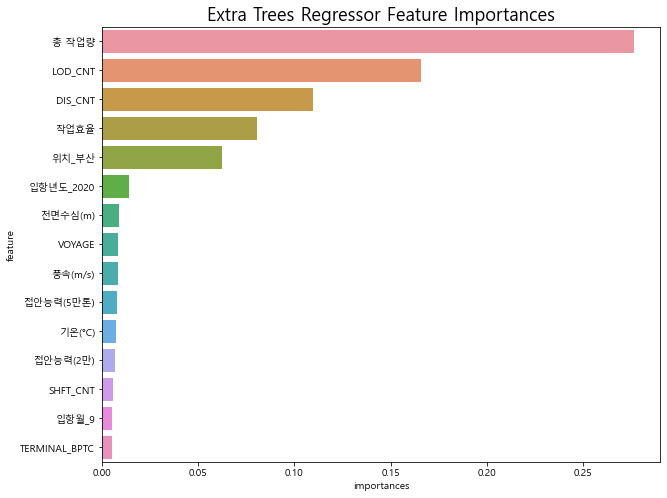

In [23]:
plt.figure(figsize=(10, 8))
sns.barplot(x='importances', y='feature', data=importances[:15])
plt.title('Extra Trees Regressor Feature Importances', fontsize=18)
plt.show()